In [25]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

Con el siguiente código se puede estudiar el valor de cierre de cada acción dureante el periodo máximo de la misma.

In [4]:
empresas = ['AMZN','AAPL','INTC','MSFT','NFLX']

recolector =[]
for nemo in empresas:
    ticker =yf.Ticker(nemo)
    px = ticker.history(period='max')['Close']
    px.name = nemo

    recolector += [px]

precios = pd.concat(recolector, axis=1)

precios

,AMZN,AAPL,INTC,MSFT,NFLX
Date,,,,,
1980-03-17 00:00:00-05:00,NaN,NaN,0.185958,NaN,NaN
1980-03-18 00:00:00-05:00,NaN,NaN,0.184470,NaN,NaN
1980-03-19 00:00:00-05:00,NaN,NaN,0.188933,NaN,NaN
1980-03-20 00:00:00-05:00,NaN,NaN,0.188189,NaN,NaN
1980-03-21 00:00:00-05:00,NaN,NaN,0.181494,NaN,NaN
...,...,...,...,...,...
2023-03-20 00:00:00-04:00,97.709999,157.399994,29.160000,272.230011,305.130005
2023-03-21 00:00:00-04:00,100.610001,159.279999,28.459999,273.779999,305.790009
2023-03-22 00:00:00-04:00,98.699997,157.830002,28.129999,272.290009,293.899994


In [5]:
# Reseteamos el index para que el campo Date lo tome como una columna en el DF
precios = precios.reset_index()

In [11]:
precios.head()

,Date,AMZN,AAPL,INTC,MSFT,NFLX
0,1980-03-17 00:00:00-05:00,NaN,NaN,0.185958,NaN,NaN
1,1980-03-18 00:00:00-05:00,NaN,NaN,0.184470,NaN,NaN
2,1980-03-19 00:00:00-05:00,NaN,NaN,0.188933,NaN,NaN
3,1980-03-20 00:00:00-05:00,NaN,NaN,0.188189,NaN,NaN
4,1980-03-21 00:00:00-05:00,NaN,NaN,0.181494,NaN,NaN


In [6]:
precios.to_csv("sp500_5Empresas.csv", index=False)

In [20]:
# Crear una lista con los símbolos por cada acción
#symbols = ['AMZN', 'AAPL', 'INTC', 'MSFT', 'NFLX']
symbols = ['AMZN']

In [21]:
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')

In [22]:
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [23]:
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [26]:
df = pd.concat([data], axis=1)

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-31,3.337500,3.356250,3.15000,3.350000,3.350000,102310000
2000-04-03,3.271875,3.284375,3.10000,3.178125,3.178125,97308000
2000-04-04,3.143750,3.271875,2.78750,3.196875,3.196875,286360000
2000-04-05,3.087500,3.246875,3.02500,3.109375,3.109375,98000000
2000-04-06,3.171875,3.275000,3.09375,3.212500,3.212500,120654000


In [28]:
df = df.reset_index()

In [29]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-31,3.337500,3.356250,3.15000,3.350000,3.350000,102310000
1,2000-04-03,3.271875,3.284375,3.10000,3.178125,3.178125,97308000
2,2000-04-04,3.143750,3.271875,2.78750,3.196875,3.196875,286360000
3,2000-04-05,3.087500,3.246875,3.02500,3.109375,3.109375,98000000
4,2000-04-06,3.171875,3.275000,3.09375,3.212500,3.212500,120654000


In [30]:
df.to_csv("Amazon.csv", index=False)

Haremos lo mismo para lás demás compañías.

In [32]:
symbols = ['AAPL']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("Apple.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [33]:
symbols = ['INTC']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("IntelInc.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [34]:
symbols = ['MSFT']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("Microsoft.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [35]:
symbols = ['NFLX']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("Netflix.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [26]:
symbols = ['HD']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("HomeD.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [27]:
symbols = ['WMT']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("Walmart.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [28]:
symbols = ['MCD']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("McDonalds.csv", index=False)

[*********************100%***********************]  1 of 1 completed


In [29]:
symbols = ['MRNA']
# Establecer la fecha de inicio como hace 23 años
start_date = datetime.datetime.now() - datetime.timedelta(days=23*365)
start_date = start_date.strftime('%Y-%m-%d')
# Establecer la fecha final como la fecha actual
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Descargar los datos utilizando el método download()
data = yf.download(tickers=symbols, start=start_date, end=end_date, interval="1d")
df = pd.concat([data], axis=1)
df = df.reset_index()
df.to_csv("Moderna.csv", index=False)

[*********************100%***********************]  1 of 1 completed


Con el siguiente código, extraeremos desde internet los siguentes valores: "Last Price", "Change", "Change". Se utilizó la API Alpha Vantage ya que Yahoo Finance no permitía hacer la consulta.

In [31]:
import pandas as pd
import requests

# API key de Alpha Vantage
api_key = "G6W7IMMF8IEX42FY"

# Símbolo de la acción que queremos obtener
symbol = "MRNA"

# URL para obtener los datos de la acción
url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"

# Hacemos la petición HTTP GET
response = requests.get(url)

# Obtenemos los datos en formato JSON
data = response.json()

# Creamos un diccionario con los valores que queremos
stock_info = {
    "Last Price": data["Global Quote"]["05. price"],
    "Change": data["Global Quote"]["09. change"],
    "% Change": data["Global Quote"]["10. change percent"]
}

# Creamos el DataFrame
df = pd.DataFrame(stock_info, index=[0])
df.to_csv("Alpha_Moderna.csv", index=False)

In [ ]:
import pandas as pd
import requests

# API key de Alpha Vantage
api_key = "G6W7IMMF8IEX42FY"

# Símbolo de la acción que queremos obtener
symbol = "MCD"

# URL para obtener los datos de la acción
url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"

# Hacemos la petición HTTP GET
response = requests.get(url)

# Obtenemos los datos en formato JSON
data = response.json()

# Creamos un diccionario con los valores que queremos
stock_info = {
    "Last Price": data["Global Quote"]["05. price"],
    "Change": data["Global Quote"]["09. change"],
    "% Change": data["Global Quote"]["10. change percent"]
}

# Creamos el DataFrame
df = pd.DataFrame(stock_info, index=[0])
df.to_csv("Alpha_McDonalds.csv", index=False)

In [2]:
ticker = "AMZN"
data = yf.download(ticker, start="2000-01-01", end="2023-03-27")
prices = data["Adj Close"].resample("Y").last()

[*********************100%***********************]  1 of 1 completed


In [8]:
df = pd.concat([prices], axis=1)
df = df.reset_index()
df.to_csv("Amazon_RClose.csv", index=False)
df

,Date,Adj Close
0,2000-12-31,0.778125
1,2001-12-31,0.541000
2,2002-12-31,0.944500
3,2003-12-31,2.631000
4,2004-12-31,2.214500
5,2005-12-31,2.357500
6,2006-12-31,1.973000
7,2007-12-31,4.632000
8,2008-12-31,2.564000
9,2009-12-31,6.726000


In [9]:
# Calcular la diferencia porcentual
df['Diff %'] = (df['Adj Close'].iloc[1:] - df['Adj Close'].shift(1).iloc[1:]) / df['Adj Close'].shift(1).iloc[1:]

In [10]:
df

,Date,Adj Close,Diff %
0,2000-12-31,0.778125,NaN
1,2001-12-31,0.541000,-0.304739
2,2002-12-31,0.944500,0.745841
3,2003-12-31,2.631000,1.785601
4,2004-12-31,2.214500,-0.158305
5,2005-12-31,2.357500,0.064574
6,2006-12-31,1.973000,-0.163097
7,2007-12-31,4.632000,1.347694
8,2008-12-31,2.564000,-0.446459
9,2009-12-31,6.726000,1.623245


In [13]:
# calcular la rentabilidad promedio anual 
PromedioRentabilidadAnual = df['Diff %'].mean()
PromedioRentabilidadAnual

0.36656886281258017

In [15]:
#calcular la desviacion estandar de la muestra, esta seria la volatilidad
desv_std = np.std(df['Diff %'])
desv_std

0.62102790904062

In [16]:
# Obtener el historial de precios de Amazon
amazon = yf.Ticker("AMZN")
hist = amazon.history(start="2000-01-01", end="2023-03-27")

# Calcular los retornos diarios
returns = hist['Close'].pct_change()

# Calcular la volatilidad anualizada
volatility = returns.std() * (252 ** 0.5)

print("La volatilidad anualizada de Amazon del 2000 al 2023 es:", round(volatility * 100, 2), "%")

La volatilidad anualizada de Amazon del 2000 al 2023 es: 50.56 %


In [17]:
# Obtener el historial de precios de Amazon
amzn = yf.download('AMZN', start='2000-01-01', end='2023-03-27')
amzn['Log Returns'] = np.log(amzn['Adj Close']) - np.log(amzn['Adj Close'].shift(1))
volatility = amzn['Log Returns'].std() * np.sqrt(252)
print("La volatilidad anualizada de Amazon desde 2000 hasta 2023 es:", round(volatility, 2))

[*********************100%***********************]  1 of 1 completed
La volatilidad anualizada de Amazon desde 2000 hasta 2023 es: 0.5


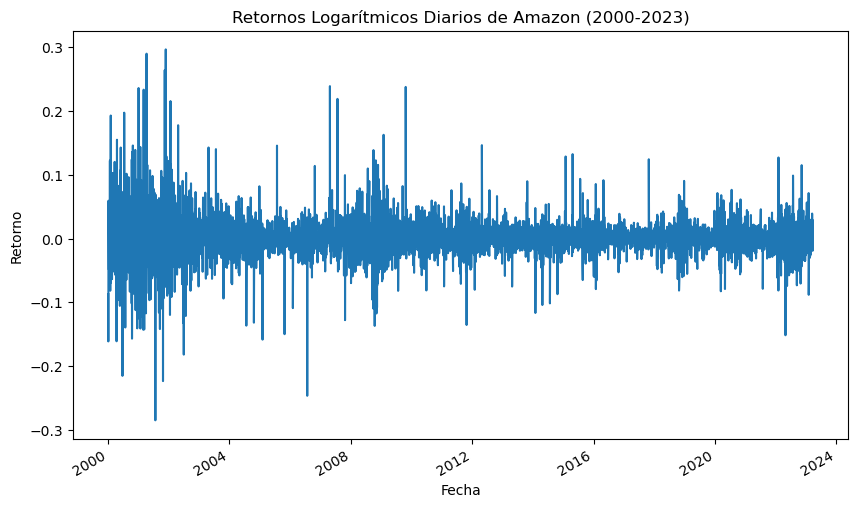

In [19]:

amzn['Log Returns'].plot(figsize=(10,6))
plt.title('Retornos Logarítmicos Diarios de Amazon (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.show()


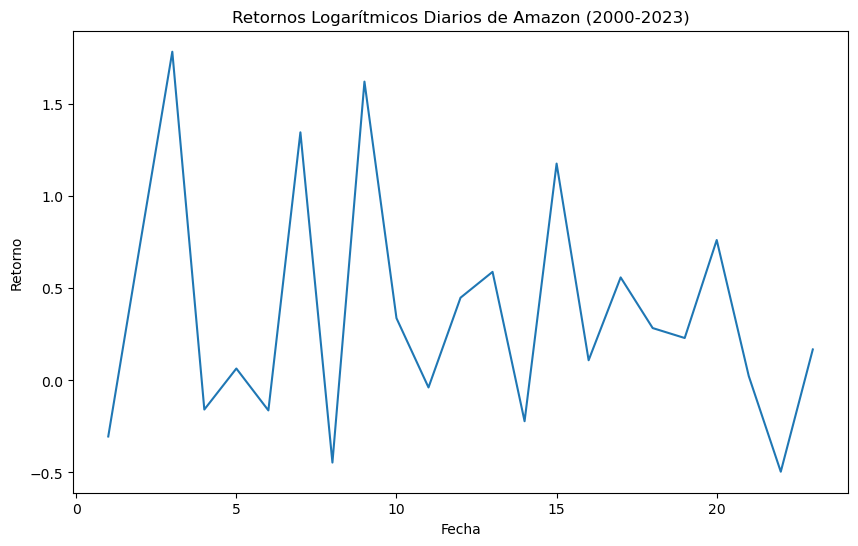

In [20]:
df['Diff %'].plot(figsize=(10,6))
plt.title('Retornos Logarítmicos Diarios de Amazon (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.show()
